# Diamond Price Prediction

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diamonds.csv')

In [5]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 11)

In [7]:
df.size

593340

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [11]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [12]:
df.duplicated().sum()

0

## Data Visualization

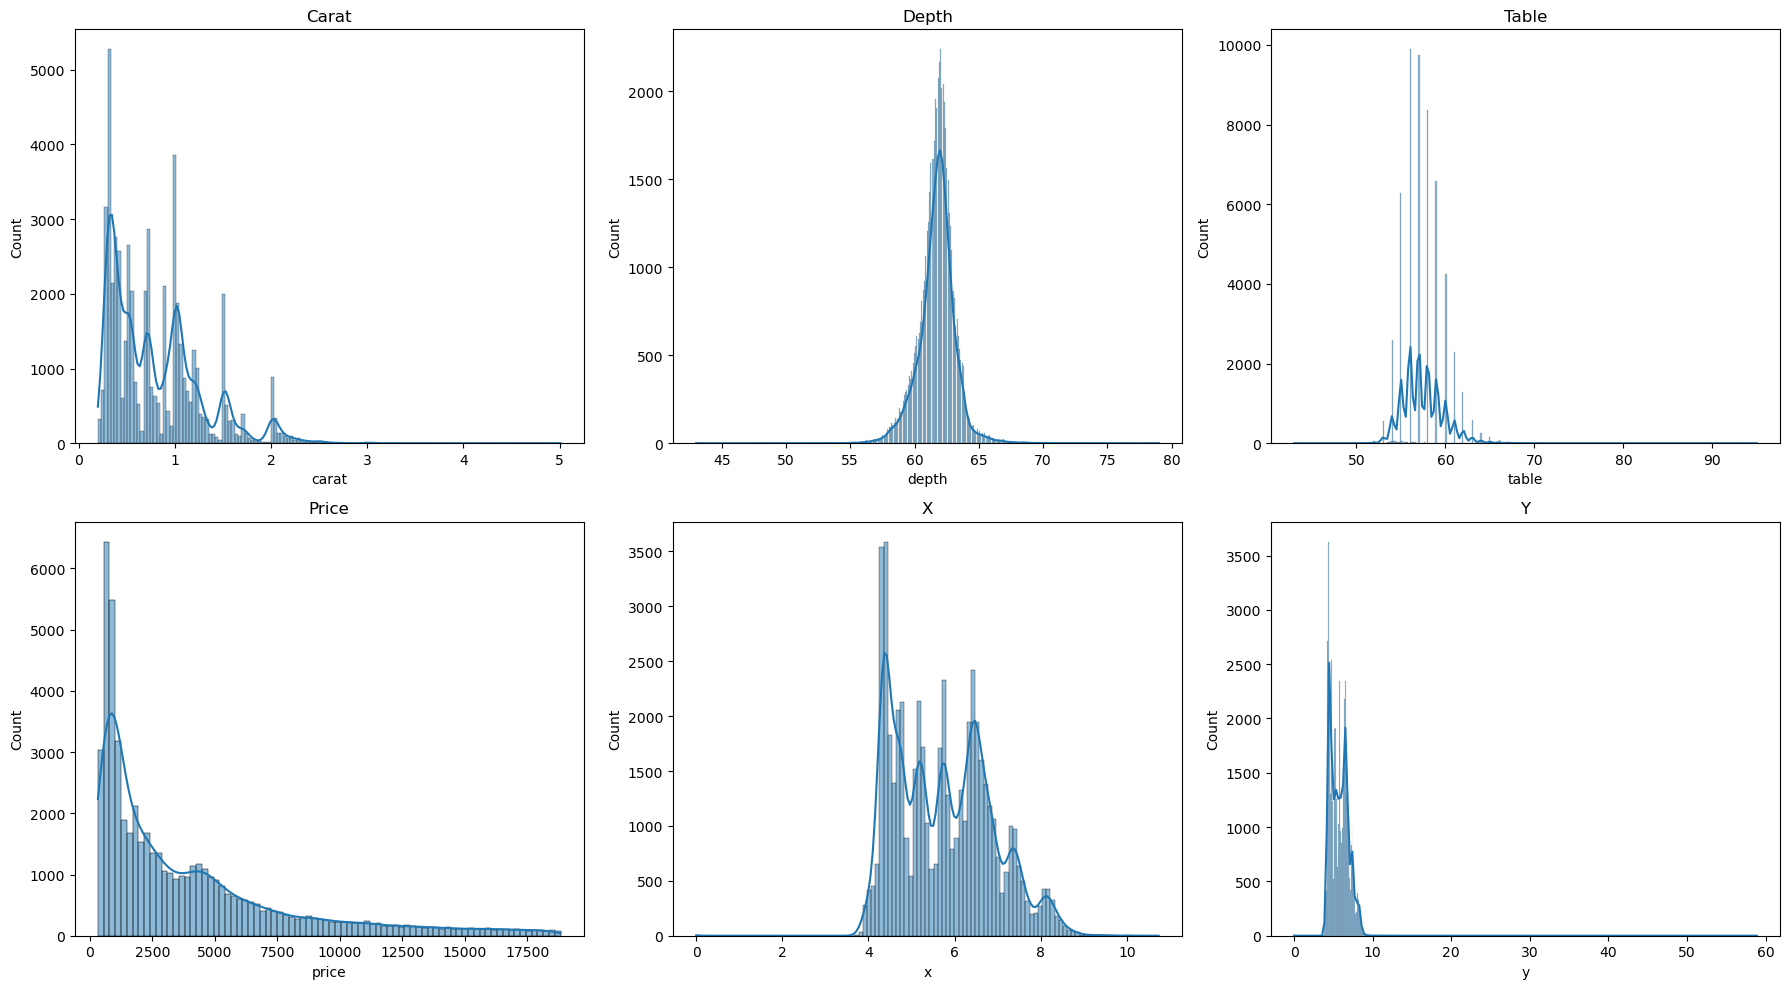

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 

sns.histplot(df['carat'], kde=True, ax=axes[0, 0]).set(title='Carat')
sns.histplot(df['depth'], kde=True, ax=axes[0, 1]).set(title='Depth')
sns.histplot(df['table'], kde=True, ax=axes[0, 2]).set(title='Table')
sns.histplot(df['price'], kde=True, ax=axes[1, 0]).set(title='Price')
sns.histplot(df['x'], kde=True, ax=axes[1, 1]).set(title='X')
sns.histplot(df['y'], kde=True, ax=axes[1, 2]).set(title='Y')

plt.tight_layout()
plt.show()

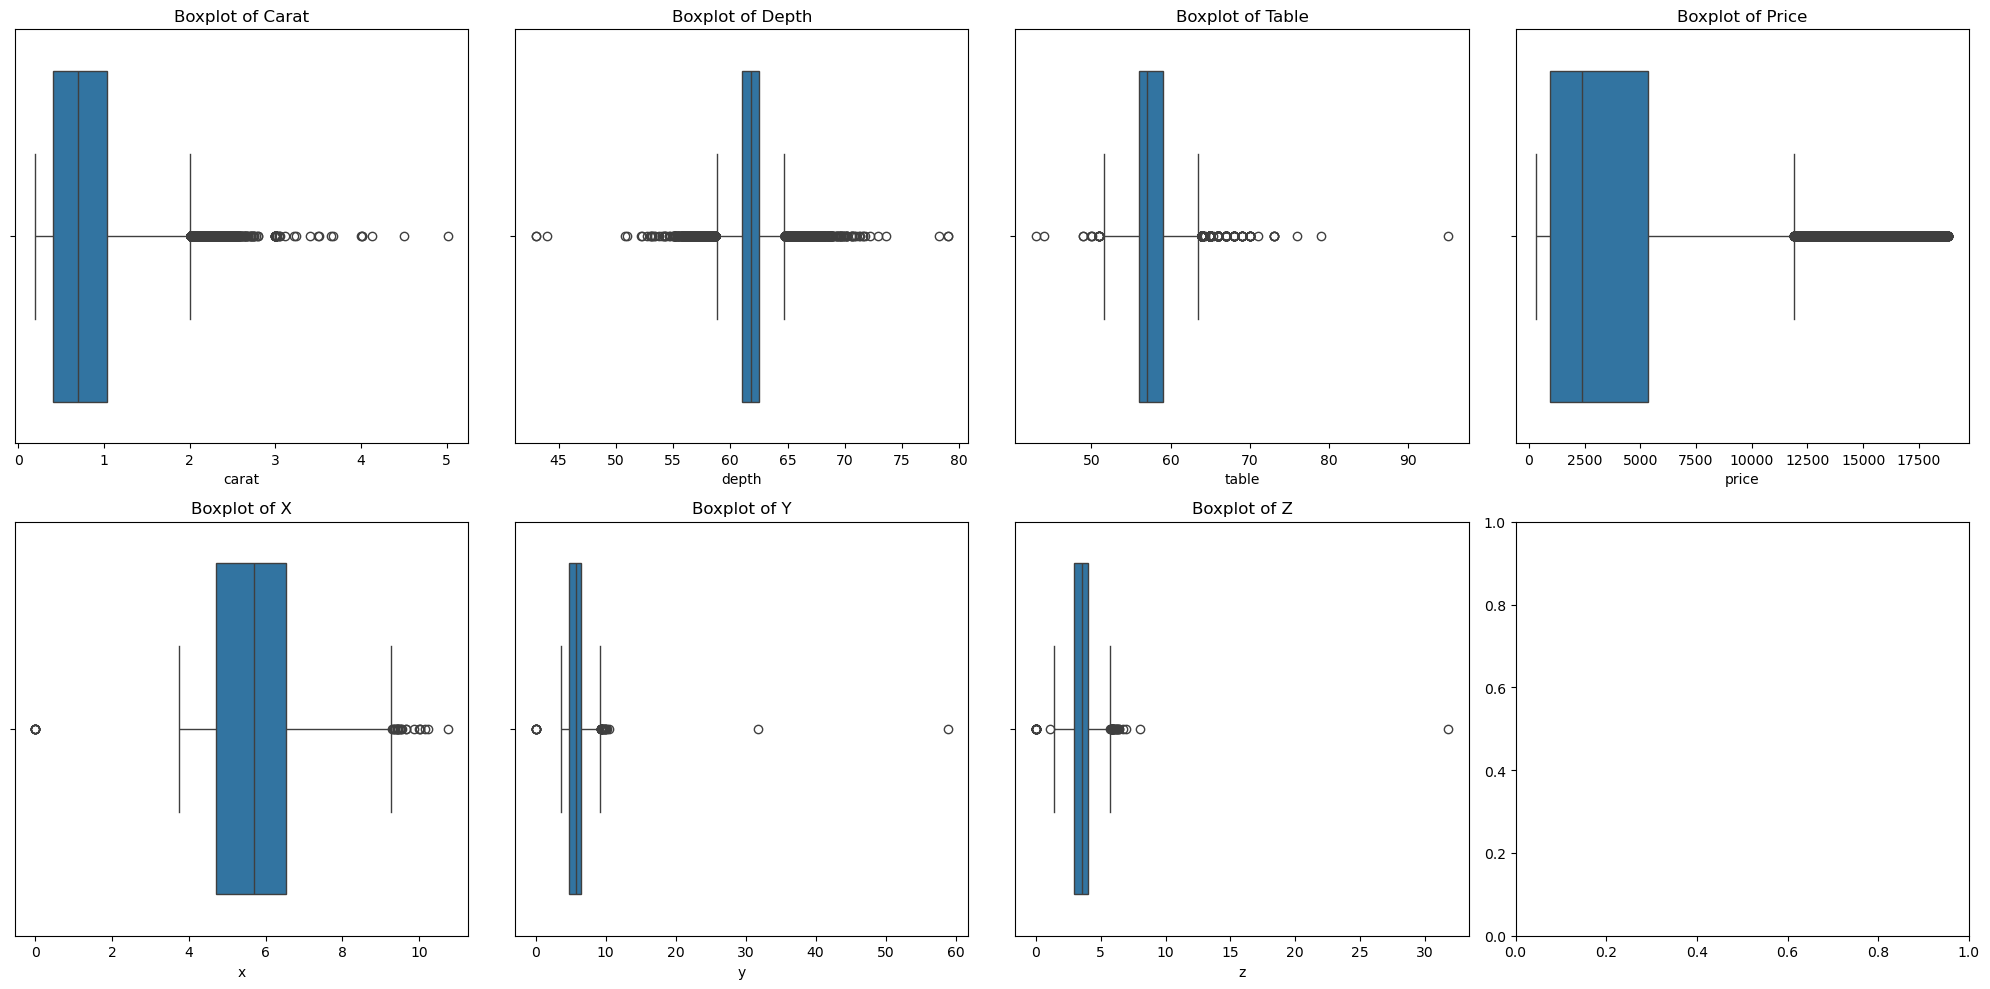

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10)) 

sns.boxplot(x=df['carat'], ax=axes[0, 0]).set(title='Boxplot of Carat')
sns.boxplot(x=df['depth'], ax=axes[0, 1]).set(title='Boxplot of Depth')
sns.boxplot(x=df['table'], ax=axes[0, 2]).set(title='Boxplot of Table')
sns.boxplot(x=df['price'], ax=axes[0, 3]).set(title='Boxplot of Price')
sns.boxplot(x=df['x'], ax=axes[1, 0]).set(title='Boxplot of X')
sns.boxplot(x=df['y'], ax=axes[1, 1]).set(title='Boxplot of Y')
sns.boxplot(x=df['z'], ax=axes[1, 2]).set(title='Boxplot of Z')

plt.tight_layout()
plt.show()

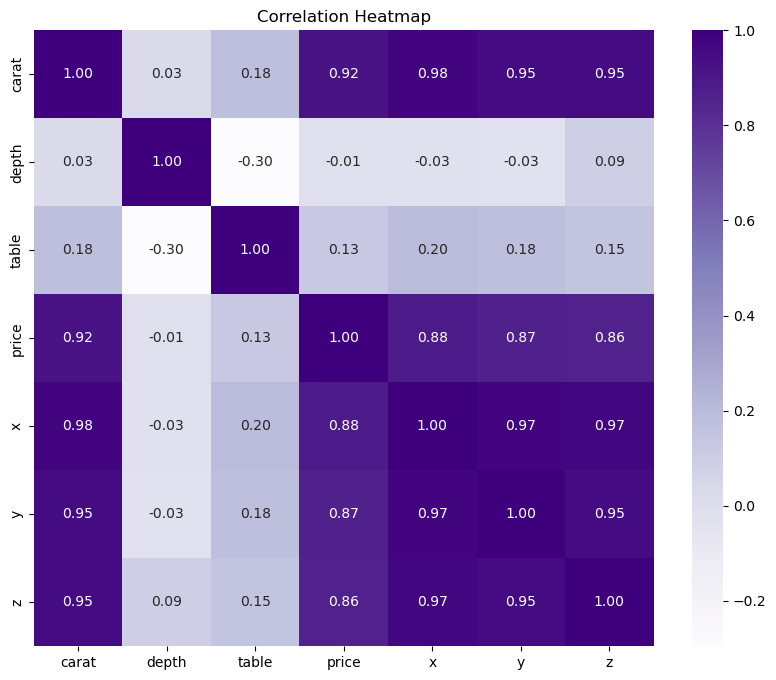

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

correlation_matrix = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', ax=ax)
plt.title('Correlation Heatmap')
plt.show()

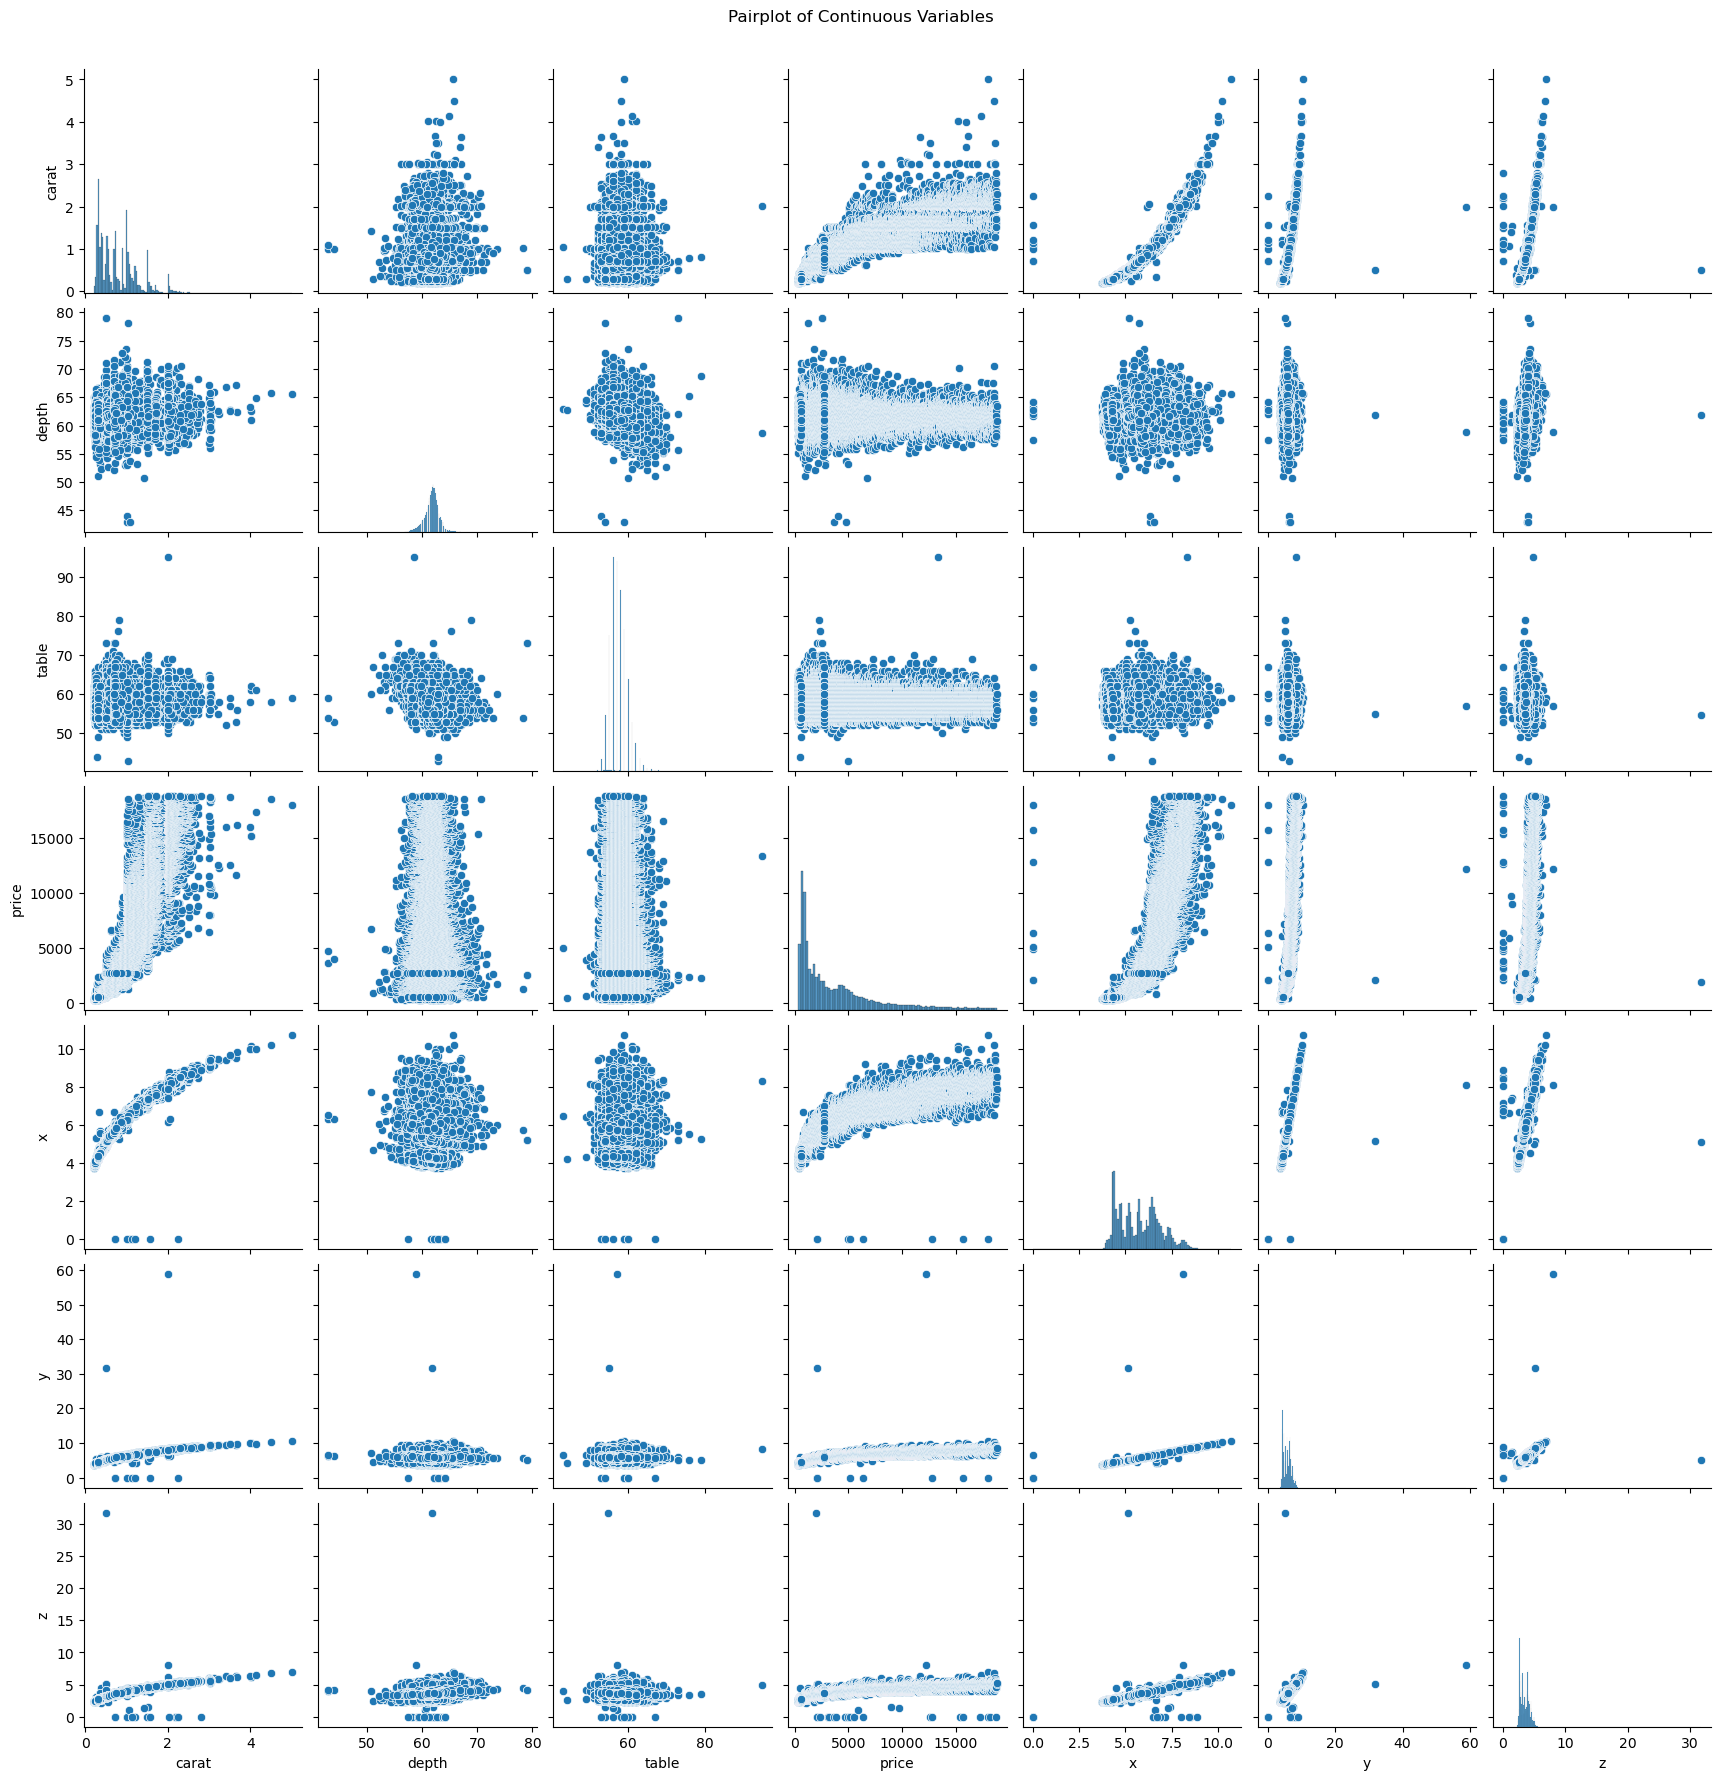

In [17]:
sns.pairplot(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()

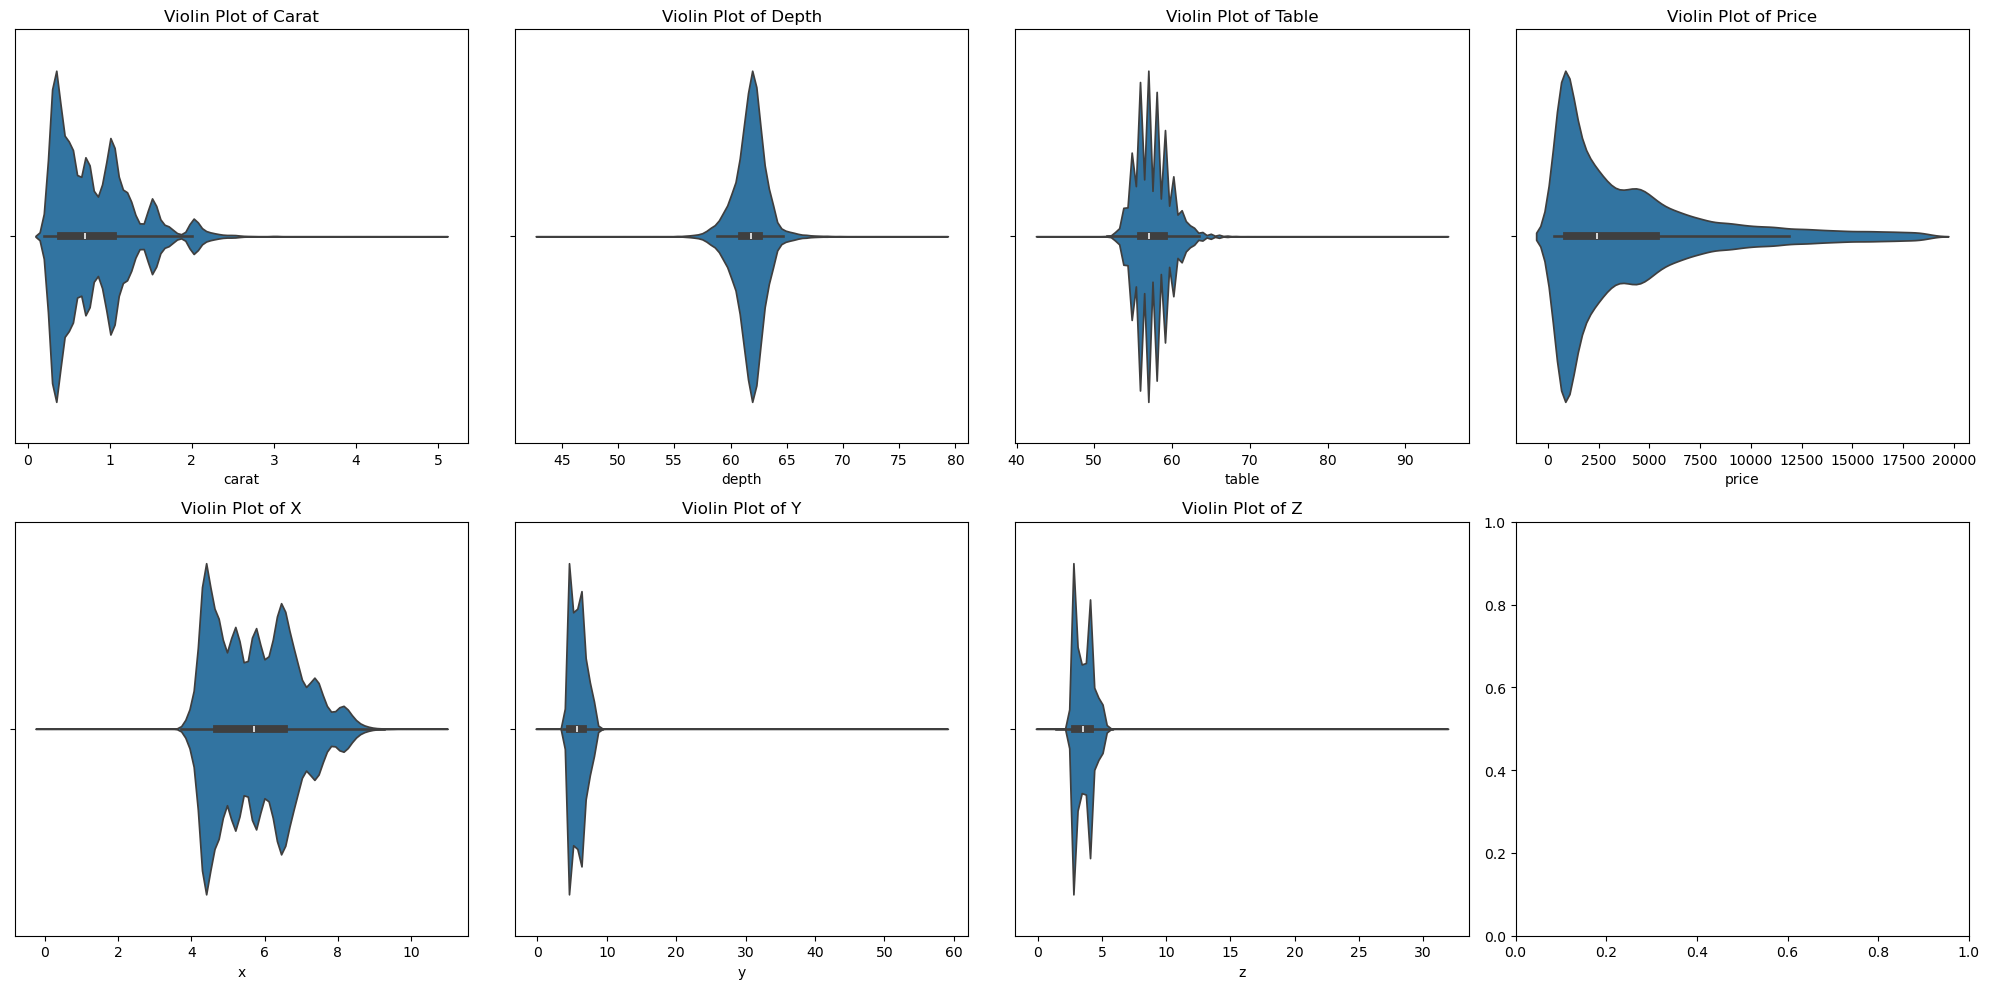

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

sns.violinplot(x=df['carat'], ax=axes[0, 0]).set(title='Violin Plot of Carat')
sns.violinplot(x=df['depth'], ax=axes[0, 1]).set(title='Violin Plot of Depth')
sns.violinplot(x=df['table'], ax=axes[0, 2]).set(title='Violin Plot of Table')
sns.violinplot(x=df['price'], ax=axes[0, 3]).set(title='Violin Plot of Price')
sns.violinplot(x=df['x'], ax=axes[1, 0]).set(title='Violin Plot of X')
sns.violinplot(x=df['y'], ax=axes[1, 1]).set(title='Violin Plot of Y')
sns.violinplot(x=df['z'], ax=axes[1, 2]).set(title='Violin Plot of Z')

plt.tight_layout()
plt.show()

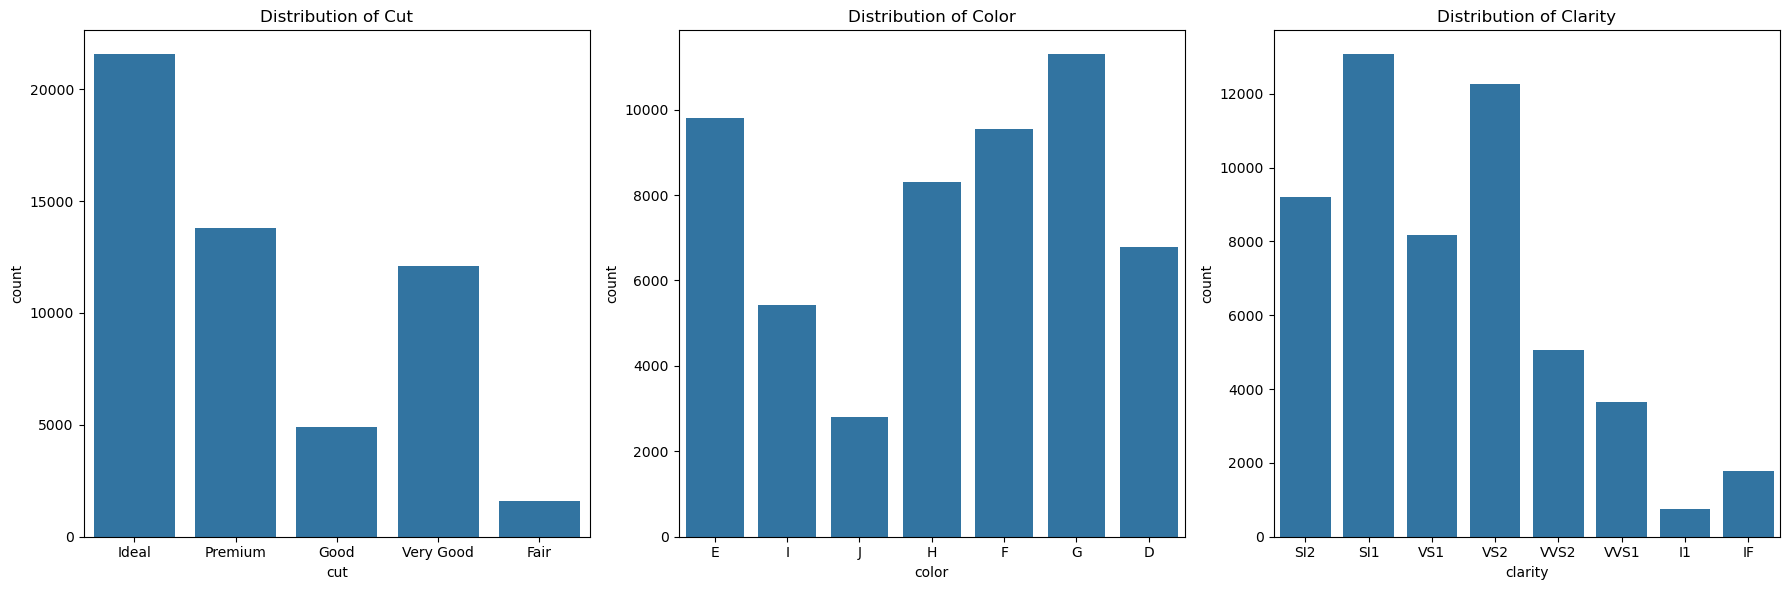

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

sns.countplot(x='cut', data=df, ax=axes[0]).set(title='Distribution of Cut')
sns.countplot(x='color', data=df, ax=axes[1]).set(title='Distribution of Color')
sns.countplot(x='clarity', data=df, ax=axes[2]).set(title='Distribution of Clarity')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [21]:
# Dropping unwatned column

df = df.drop(columns=['Unnamed: 0'])

In [22]:
# Dropping dimentionless diamonds

df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [23]:
# Dropping outliers

df = df[(df["depth"] < 75) & (df["depth"] > 45)]
df = df[(df["table"] < 80) & (df["table"] > 40)]
df = df[df["x"] < 30]
df = df[df["y"] < 30]
df = df[(df["z"] < 30) & (df["z"] > 2)]

In [24]:
# One Hot Encoding to convert categorical data to numerical data

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)  
y = df['price'] 

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [27]:
df.head(2)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.469298,0.333333,0.0,0.031384,0.043732,0.075203,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.394737,0.500000,0.0,0.022825,0.023324,0.050813,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [30]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [32]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.919092938078353,
 0.9777247309684753,
 0.9741372238549482,
 0.8387758314069786,
 0.9531287083320994,
 0.9722371166604044]

## Model Evaluation

In [69]:
# R2 score

XGBoost.fit(X_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,XGBoost.predict(X_test)))

The R2 score of Random Forest :  0.9777247309684753


In [35]:
# Mean Squared Error (MSE) 

y_pred = XGBoost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Random Forest: ", mse)

Mean Squared Error (MSE) for Random Forest:  338309.8769579427


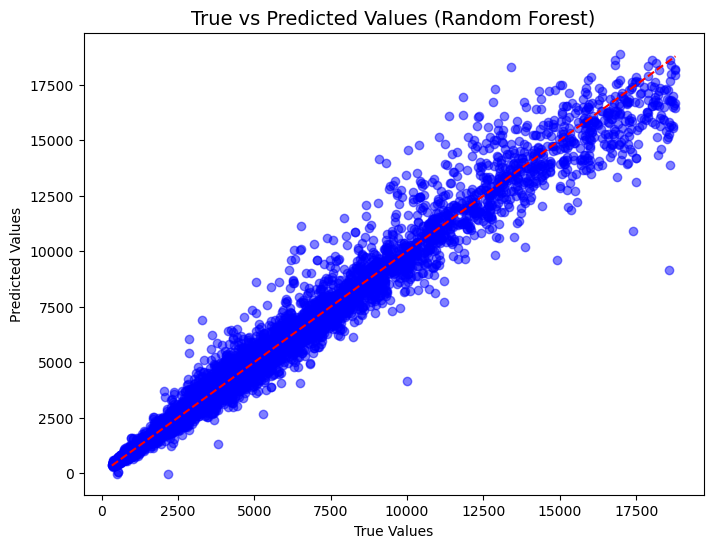

In [36]:
# Plotting True vs Predicted values

y_pred = XGBoost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('True vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()